# Graph API Readings from Raspberry Pi
This notebook fetches sensor readings from the API and plots them.

In [ ]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Set your API endpoint here
API_URL = 'http://raspberrypi.middlebury.edu:5000/readings'  # Change if needed

# Fetch the readings
response = requests.get(API_URL)
response.raise_for_status()
data = response.json()

# Display the raw JSON (optional)
data = [
    {'sensor_id': 'TempProbe-Tank1', 'timestamp': '2025-04-18T16:27:37.227281+00:00', 'type': 'Water temperature', 'value': 20.05},
    {'sensor_id': 'ECMeter-Tank1', 'timestamp': '2025-04-18T16:27:37.186311+00:00', 'type': 'EC', 'value': 1425.91},
    {'sensor_id': 'PHProbe-Tank1', 'timestamp': '2025-04-18T16:27:37.158227+00:00', 'type': 'pH', 'value': 7.99},
    {'sensor_id': 'TempProbe-Tank1', 'timestamp': '2025-04-18T16:26:37.200133+00:00', 'type': 'Water temperature', 'value': 26.39},
    {'sensor_id': 'ECMeter-Tank1', 'timestamp': '2025-04-18T16:26:37.155195+00:00', 'type': 'EC', 'value': 1980.34},
    {'sensor_id': 'PHProbe-Tank1', 'timestamp': '2025-04-18T16:26:37.130182+00:00', 'type': 'pH', 'value': 6.72},
    {'sensor_id': 'TempProbe-Tank1', 'timestamp': '2025-04-18T16:25:37.168194+00:00', 'type': 'Water temperature', 'value': 28.78},
    {'sensor_id': 'ECMeter-Tank1', 'timestamp': '2025-04-18T16:25:37.127254+00:00', 'type': 'EC', 'value': 1173.53},
    {'sensor_id': 'PHProbe-Tank1', 'timestamp': '2025-04-18T16:25:37.099105+00:00', 'type': 'pH', 'value': 6.24},
    {'sensor_id': 'TempProbe-Tank1', 'timestamp': '2025-04-18T16:24:37.141312+00:00', 'type': 'Water temperature', 'value': 20.45},
    {'sensor_id': 'ECMeter-Tank1', 'timestamp': '2025-04-18T16:24:37.096342+00:00', 'type': 'EC', 'value': 1291.91},
]

[{'sensor_id': 'TempProbe-Tank1',
  'timestamp': '2025-04-18T16:27:37.227281+00:00',
  'type': 'Water temperature',
  'value': 20.05},
 {'sensor_id': 'ECMeter-Tank1',
  'timestamp': '2025-04-18T16:27:37.186311+00:00',
  'type': 'EC',
  'value': 1425.91},
 {'sensor_id': 'PHProbe-Tank1',
  'timestamp': '2025-04-18T16:27:37.158227+00:00',
  'type': 'pH',
  'value': 7.99},
 {'sensor_id': 'TempProbe-Tank1',
  'timestamp': '2025-04-18T16:26:37.200133+00:00',
  'type': 'Water temperature',
  'value': 26.39},
 {'sensor_id': 'ECMeter-Tank1',
  'timestamp': '2025-04-18T16:26:37.155195+00:00',
  'type': 'EC',
  'value': 1980.34},
 {'sensor_id': 'PHProbe-Tank1',
  'timestamp': '2025-04-18T16:26:37.130182+00:00',
  'type': 'pH',
  'value': 6.72},
 {'sensor_id': 'TempProbe-Tank1',
  'timestamp': '2025-04-18T16:25:37.168194+00:00',
  'type': 'Water temperature',
  'value': 28.78},
 {'sensor_id': 'ECMeter-Tank1',
  'timestamp': '2025-04-18T16:25:37.127254+00:00',
  'type': 'EC',
  'value': 1173.53},
 

In [ ]:
# Convert to DataFrame (adjust based on your API's JSON structure)
# For example, if data is a list of dicts with 'timestamp', 'value'
df = pd.DataFrame(data)
df['timestamp'] = pd.to_datetime(df['timestamp'])
df = df.sort_values('timestamp')
df.head()

,sensor_id,timestamp,type,value
14,PHProbe-Tank1,2025-04-18 16:23:37.040634+00:00,pH,7.00
13,ECMeter-Tank1,2025-04-18 16:23:37.068791+00:00,EC,2000.00
12,TempProbe-Tank1,2025-04-18 16:23:37.109738+00:00,Water temperature,25.01
11,PHProbe-Tank1,2025-04-18 16:24:37.071386+00:00,pH,7.91
10,ECMeter-Tank1,2025-04-18 16:24:37.096342+00:00,EC,1291.91


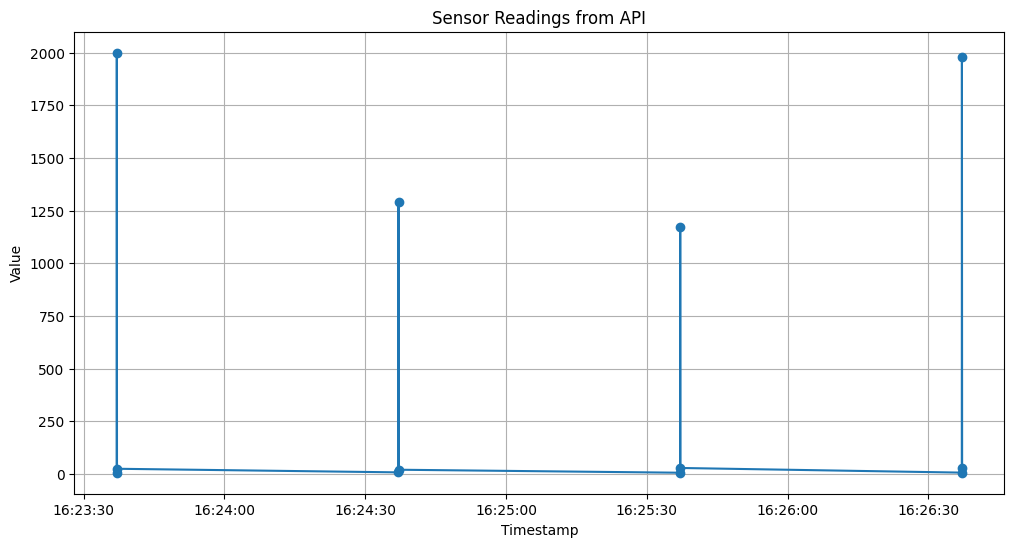

In [ ]:
# Plot the readings
plt.figure(figsize=(10, 6))

for sensor_type in df['type'].unique():
    sensor_df = df[df['type'] == sensor_type]
    plt.plot(sensor_df['timestamp'], sensor_df['value'], marker='o', label=sensor_type)

plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.title('Sensor Readings Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()